<div style="text-align: center;">
  <h1>Wine Quality Classification</h1>
  <h2>Author: Korosaki</h2>
  <h3>Date: Feb 2025</h3>
</div>

# Data Frame

In [1]:
import joblib
import yaml
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

data_path = config['paths']['data']
model_path = config['paths']['model']

print(data_path)
print(model_path)

D:/Workspace/Machine_Learning/Supervised_Learning/Classification/Wine_Quality_Classification/data
D:/Workspace/Machine_Learning/Supervised_Learning/Classification/Wine_Quality_Classification/model


In [3]:
from summarytools import dfSummary

df = pd.read_csv(join(data_path, 'raw/wine_data.csv'))
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,fixed_acidity[float64],Mean (sd) : 9.8 (2.4)min < med < max:3.8 < 10.0 < 15.9IQR (CV) : 4.2 (4.1),120 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACx0lEQVR4nO3dsW4aMRzH8Z9LEi4EHSAk2LJmqNQhIw/Rh+0jZMjQMcobsKEkCBQKhRA6dajUpjn7zPnvfD+7lRu+spzDZ7vD4SAgdZ+afgDgPU6afoC3OOfOJZ15Dt8eDod1nc+D5iQbqnPufDgcfi3LcuAzfrlczp1z34g1D8mGKumsLMvBZDJZ93q9TZWBi8WiuL29HTw+Pp5JItQMpByqJKnX621Go9EPj6HntT8MGpN8qB9N4LpcynRtTqgJCV2XS/muzQk1goBZsex2u6PJZLKsui6X8l6bE2rNQmbF3W5X7Pf7z+12+8ZzXS5lujYn1Pp5v62YTqeD+/v7zsvLSyvWw1lFqJH4vK2Yz+dZzoZ14CdUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJjAL1P/ELKx5PX19bTu53mv/X5/Kql0zvkMT3aLIKH+RR0bSzabzY0k340lXlar1elut/tyeXnZarValXdfpbxFMNtQA2cW7+12TW4s2W63J0VRdK6vrzfj8XheZWzqWwSzDDV0ZgnZbpfCxpKLi4vsPt/JMtSQmUViu12Ksgz1N9+ZJYVZEX/i9RRMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGFC1I/7Ai/3avTEEaQlWqihl3s1eeLIRxV4aIcU8UigmDOq9zU2Et/WH1vooR1S3COBon/X73vpLt/WH1fooR2xjwTK+gAKVBdwHJAU8Ugg/uuHCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGEC+1FRm5g3W/83VKvXgeO4Yt9s/WaodVwH/vDw8L3qWEl6fn4uJGm1WhWz2axzrLFN/m2rzy1JT09P3aIoOldXV67f7/+sMna9Xrfv7u7e/IzlF3qodyA3SVHiAAAAAElFTkSuQmCC"">",0(0.0%)
2,volatile_acidity[float64],Mean (sd) : 0.8 (0.4)min < med < max:0.1 < 0.8 < 1.6IQR (CV) : 0.7 (2.1),232 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqElEQVR4nO3dMY7aQBSA4TdhIQYiA0KCjpYiUgpKDpHD5ggpOMCKG9AhATLCwcEYUiNtWPAweN7wf72XKX6jnRmPMefzWQDffal6AMAt3qoeAC4ZY5oi0rD4E4fz+bx/1Hh8QageMcY0+/3+zziOe2X/xna73RhjfoUWK6H6pRHHcW86ne47nU5278VJkkSz2ay3Wq0aIkKocKvT6WSDweBPycubDx2MJ5hMQQVChQqEChUIFSoQKlRwOutn8RqP4izUV168trhB49PpVH/0eELg8hv1JRevbW7QPM+joii+Z1n2W0TKrqMGyfmC/wsuXpe+QReLRW8+n7eOx2PN1eC0YmfKkTI36Gaz0XhjPgWzfqhAqFCBUKECoUIFQoUKzPoDUxRFXURiY0yZy73dCSTUgKRpWs/z/MdoNKrVarW7N1l83gkk1IAcDoe3KIpak8kkGw6Hm3uu9X0nkFD/Q/N+fbvdLrsb6O2GA6F+gP16/xDqx9iv9wyhXsF+vT9YR4UKhAoVCBUqECpUIFSoQKhQgVChQrDrqJbvFKh8GxSXggzV9p0CbIP6J8hQxfKdAmyD+ifUUEWk/DsF2Ab1z6ehan7cDeG4GmrVj7tZHKvgJgnMZ9+olT3uZnOsgslQeG76H7WKx91sjlUwGQqP95OpMscqmAyFx/tQ8TyWR61FHB63JlSIiP1RaxG3x60JFSJiNycQcX/cmlBxweKotYjD49Y8PQUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlTgzBQexuUvWxMqHsL1L1vfFGqSJNG9H7zb7SIRkTRNo+Vy2Xrm9Vo/W+u4RUTW6/W3KIpa4/HYdLvdv/dcu9/vv76/v189av0PFm2kF3W71KMAAAAASUVORK5CYII="">",0(0.0%)
3,citric_acid[float64],Mean (sd) : 0.8 (0.4)min < med < max:0.0 < 0.9 < 1.7IQR (CV) : 0.7 (2.1),160 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACiUlEQVR4nO3dP27iQBSA8TdLQAa0thASdFxgpRSUHGIPu0fYghNwAxqEhJAR3lgY41QpIkUJ/jPLe5Pv1xtcfCJ+nhnFVVUlgHY/Hn0DwD2eHn0DeM85NxSRQYuPuFRV9dLV/WhBqIo454bT6fR3HMeTpp9xOp2Ozrk/ocVKqLoM4jierFarlyRJ8roXp2kardfryeFwGIgIocKvJEny2Wz2r+Hlw05vRgmGKZhAqDCBP/0etJjc49vt1u/6fkJAqB1rM7kXRRGVZfkrz/O/ItL0GTVIhNq9xpP7drudbDab0fV67fm6OasI1ZMmk/vxeAxyYu+C11BZZUFXvIXKKgu65PMXlVUWdMb7MyqrLOgCL/xhAlN/YMqy7ItI7Jxrcrna4ZVQA5JlWb8oiufFYtHr9Xq15wLNwyuhBuRyuTxFUTRaLpf5fD4/1rlW+/BKqAEaj8dNB1i1wyvDFEwgVJhAqDCBUGECocIEQoUJql9PhbrKgvrUhhryKgvqUxtqyKssqE9tqG9CXGVBfepDfRSOPOtCqB/gyLM+hPoxjjwrQ6if4MizHrzwhwmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJwa5Mtdx0zcYSZYIMte2mazaW6BNkqG02XYuwsUSjIEN903TT9XfdWNLycUnE4zm1oEPF/do+Lon4PadGqBCR9o9Lvs+pESreaXFGTcTjOTXeo8IEQoUJhAoTCBUmfDlMcb4dGnwaKufbocVXv6icb4cKd71H5Xw7Ho1hCiYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmsMMfnfH5D+zuCjVN06jut57P50hEJMuyaL/fj/7n9Va/2+p9i4jsdrufPv+B3SunhaATNfI+kQAAAABJRU5ErkJggg=="">",0(0.0%)
4,residual_sugar[float64],Mean (sd) : 31.3 (19.0)min < med < max:0.6 < 37.6 < 65.8IQR (CV) : 37.0 (1.6),738 distinct va

In [4]:
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [5]:
df.shape

(21000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [7]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df.nunique()

fixed_acidity            120
volatile_acidity         232
citric_acid              160
residual_sugar           738
chlorides                517
free_sulfur_dioxide     2087
total_sulfur_dioxide    2884
density                 3829
pH                       112
sulphates                172
alcohol                  114
quality                    7
dtype: int64

# Data Visualization

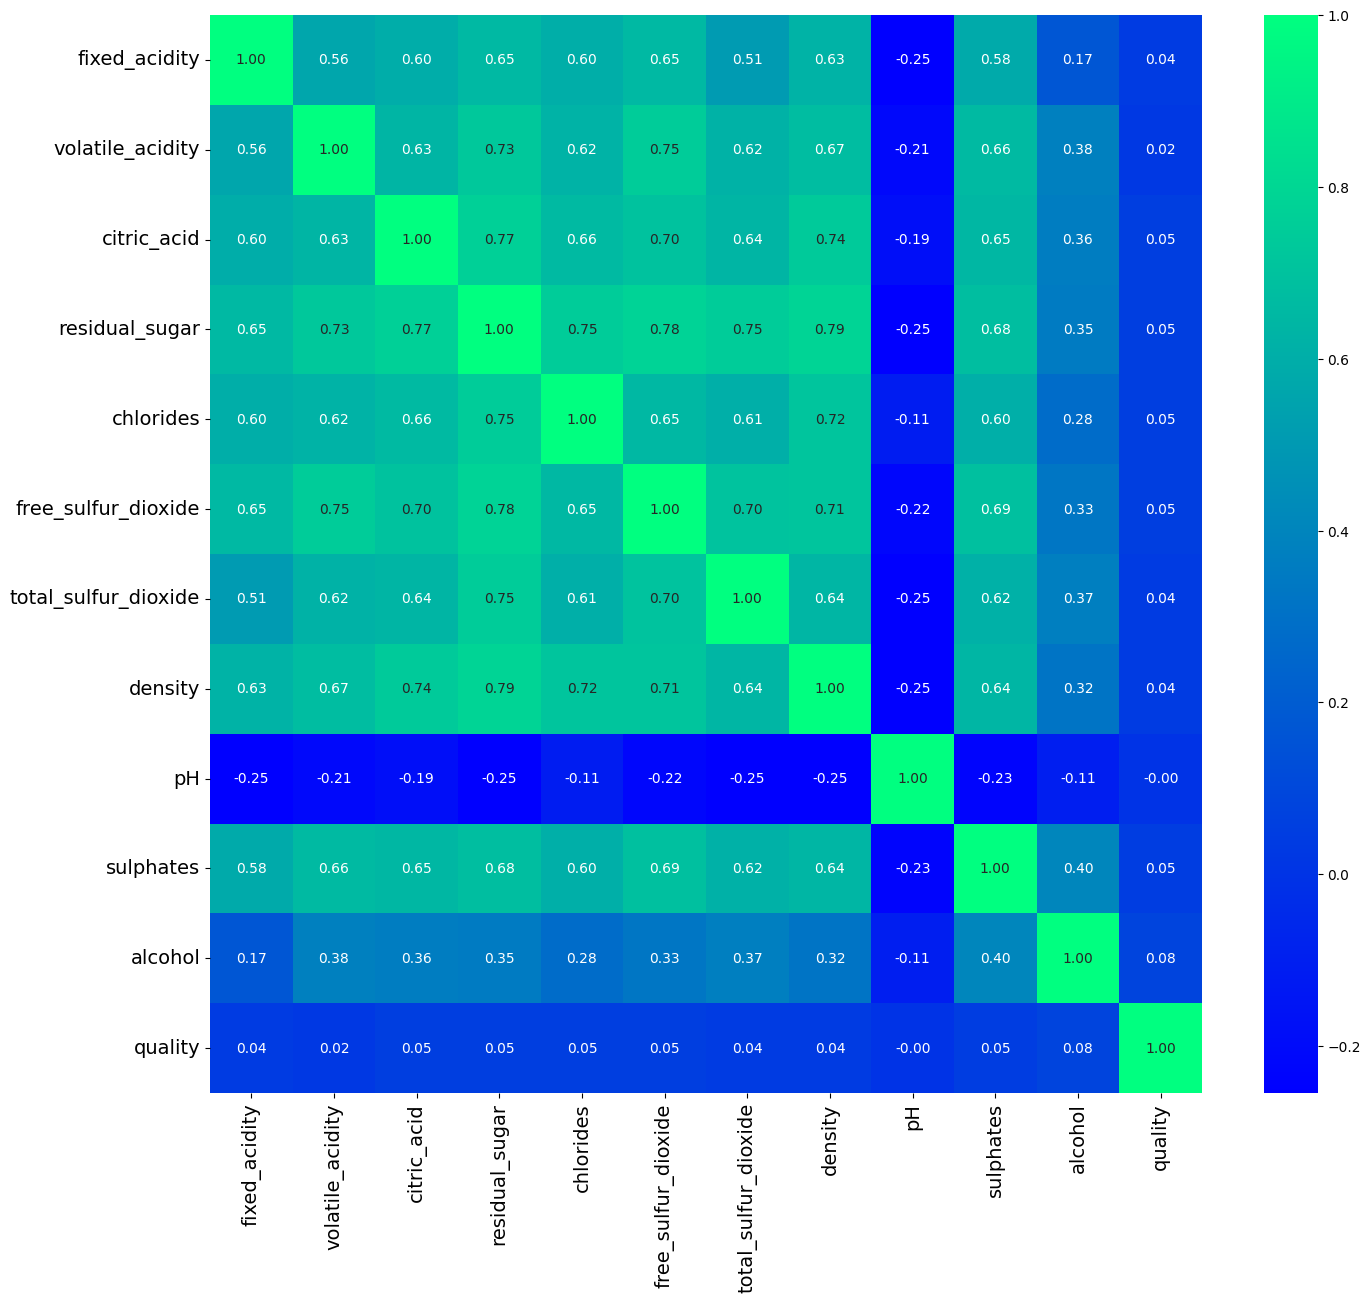

In [9]:
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, cmap='winter', fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Feature Engineering

In [10]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df['total_acidity'] = df['fixed_acidity'] + df['volatile_acidity'] + df['citric_acid']
df['sugar_alcohol_ratio'] = df['residual_sugar'] / df['alcohol']
df['mineral_index'] = df['chlorides'] + df['sulphates']

In [12]:
df['mean_acidity'] = (df['fixed_acidity'] + df['volatile_acidity'] + df['citric_acid']) / 3
df['total_sulfur'] = df['free_sulfur_dioxide'] + df['total_sulfur_dioxide']

In [13]:
df['alcohol_quality_interaction'] = df['alcohol'] * df['quality']
df['acidity_pH_balance'] = df['fixed_acidity'] / df['pH']

In [14]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,total_acidity,sugar_alcohol_ratio,mineral_index,mean_acidity,total_sulfur,alcohol_quality_interaction,acidity_pH_balance
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,12.840,0.244444,0.644,4.280000,57.0,27.0,3.569231
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,11.500,0.250000,0.830,3.833333,21.0,25.2,3.291139
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,8.585,0.397196,0.637,2.861667,19.0,32.1,2.038567
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,11.260,0.151515,1.005,3.753333,82.0,29.7,3.076923
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,9.340,0.309091,0.574,3.113333,17.0,33.0,2.385057


In [15]:
df.to_csv(join(data_path, 'processed/processed_data.csv'), index=False)

In [16]:
cate = [feature for feature in df.columns if df[feature].dtypes == 'O']
cate

[]